In [113]:
import os
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from collections import defaultdict

In [2]:
plt.rcParams['figure.figsize'] = [10, 20]

In [3]:
annotations_folder = "/home/pandian/Dataset/rico/annotations"
annotations_path = Path(annotations_folder)

In [4]:
screenshots_folder = "/home/pandian/Dataset/rico/screenshots"
screenshots_path = Path(screenshots_folder)

In [33]:
def parse_annotation(obj):
    """Pull all values of specified key from nested JSON."""
    arr = defaultdict(list)

    def extract(obj, arr):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            if "componentLabel" in obj.keys():
                label = obj["componentLabel"]
                bounds = obj.get("bounds", [])
                class_name = obj.get("class", "")
                resource_id = obj.get("resource-id", "")
                text = obj.get("text", "")
                
                arr[label].append({
                    "class_name": class_name,
                    "bounds": bounds,
                    "resource_id": resource_id,
                    "text": text
                })
                
            else:
                for k, v in obj.items():
                    if isinstance(v, (dict, list)):
                        extract(v, arr)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr)
        return arr

    results = extract(obj, arr)
    return results

In [34]:
def parse_screenshot_annotation(obj):
    """Pull all values of specified key from nested JSON."""
    arr = defaultdict(list)

    def extract(obj, arr):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            if "class" in obj.keys():
                class_name = obj.get("class", "")
                bounds = obj.get("rel-bounds", [])
                text = obj.get("text", "")
                
                arr[class_name].append({
                    "bounds": bounds,
                    "text": text
                })
                
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr)
        return arr

    results = extract(obj, arr)
    return results

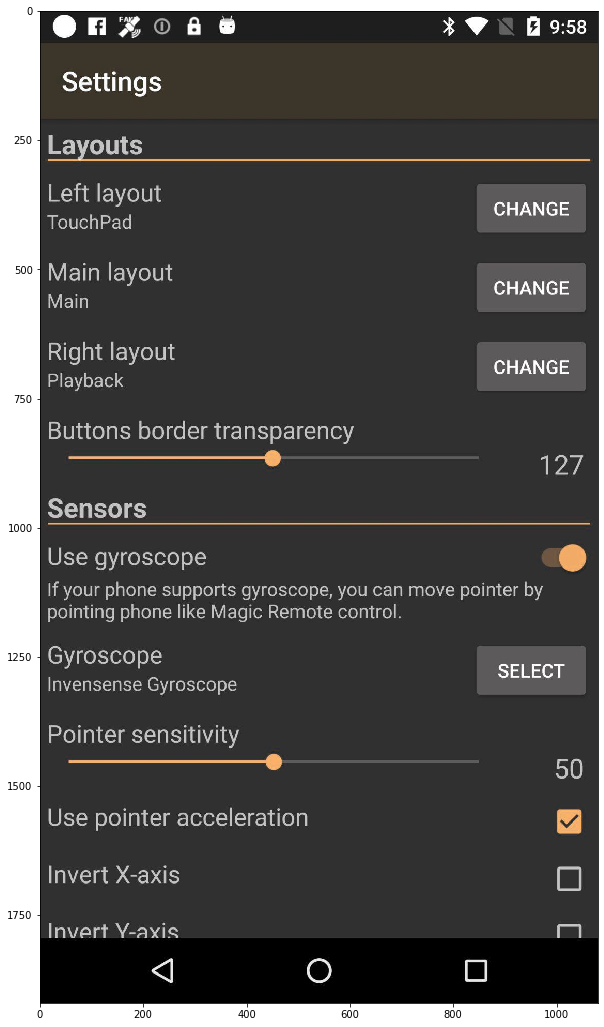

In [182]:
image_name = 1758

image_path = screenshots_path.joinpath(f"{image_name}.jpg").as_posix()
bounds_image_path = annotations_path.joinpath(f"{image_name}.png").as_posix()
json_path = annotations_path.joinpath(f"{image_name}.json").as_posix()
screenshot_json_path = screenshots_path.joinpath(f"{image_name}.json").as_posix()

image = cv2.imread(image_path)
bounds_image = cv2.imread(bounds_image_path)
with open(json_path, "r") as f:
    orig_annotation = json.load(f)
    annotation = parse_annotation(orig_annotation)
    
with open(screenshot_json_path, "r") as f:
    orig_screenshot_annotation = json.load(f)
    screenshot_annotation = parse_screenshot_annotation(orig_screenshot_annotation)
    
original_image = image.copy()
original_bounds_image = bounds_image.copy()

plt.imshow(original_image)

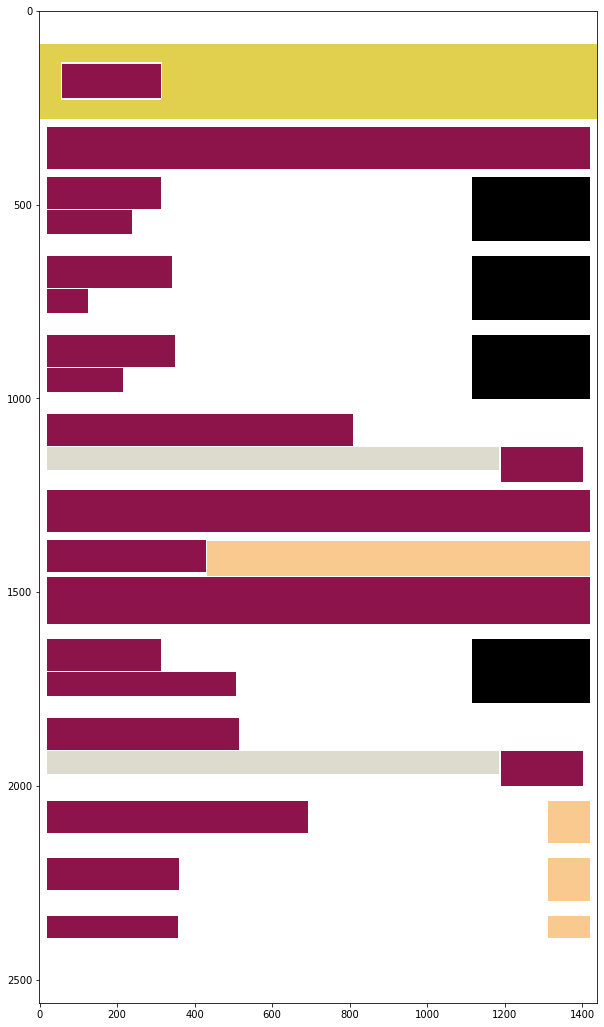

In [169]:
plt.imshow(original_bounds_image)

In [170]:
_,_,o_w,o_h = orig_annotation["bounds"]
c_h,c_w,_ = image.shape

In [171]:
w_r = c_w / o_w
h_r = c_h / o_h

In [172]:
[w_r * o_w, c_w], [h_r * o_h, c_h]

([1080.0, 1080], [1920.0, 1920])

In [173]:
annotation.keys()

dict_keys(['Toolbar', 'Text', 'Text Button', 'Input', 'Slider'])

(1310, 2036) (1422, 2148)
(1310, 2184) (1422, 2296)
(1310, 2332) (1422, 2392)
(430, 1365) (1422, 1459)


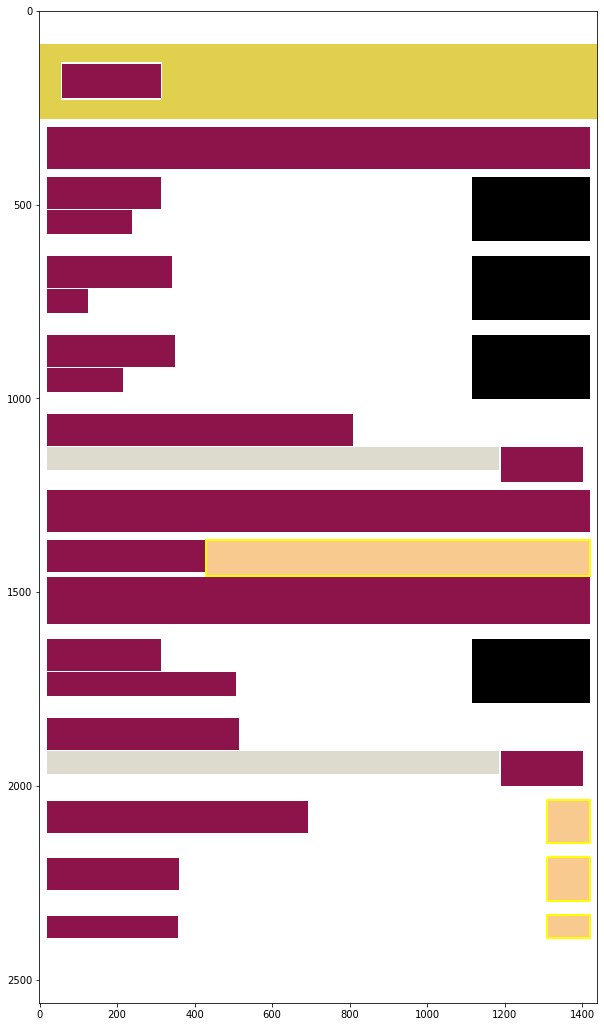

In [178]:
bounds_image = original_bounds_image.copy()
for icon in annotation["Input"]:
    x1,y1,x2,y2 = icon["bounds"]    
    print((x1,y1),(x2,y2))
    cv2.rectangle(bounds_image, (x1,y1), (x2, y2), color=(255,255,0), thickness=3)
    
plt.imshow(bounds_image)

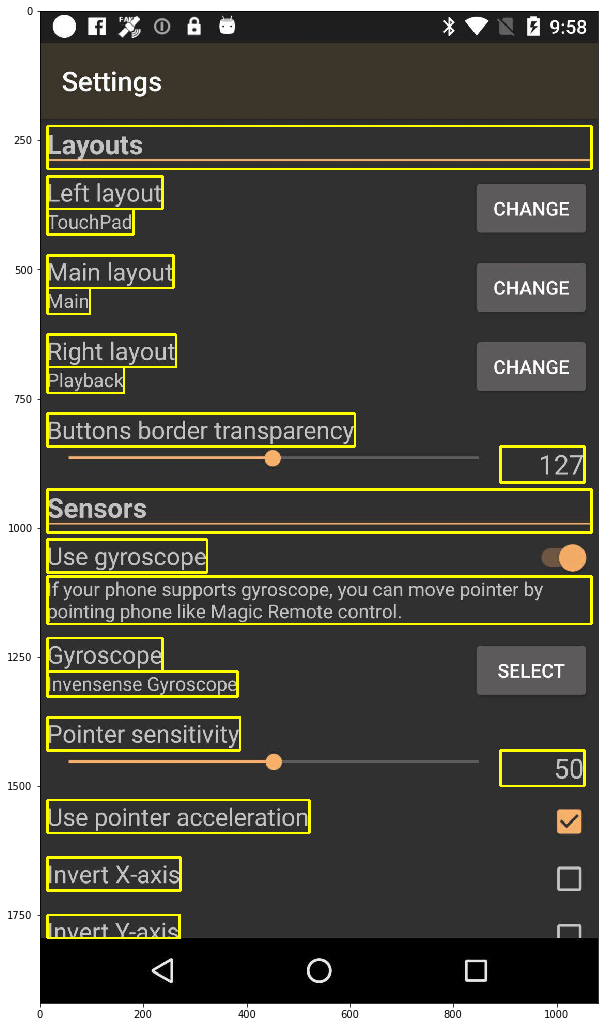

In [184]:
image = original_image.copy()
for icon in annotation["Text"]:
    x1,y1,x2,y2 = icon["bounds"]    
    pt1 = (math.ceil(x1 * w_r), math.ceil(y1 * h_r))
    pt2 = (math.ceil(x2 * w_r), math.ceil(y2 * h_r))
    cv2.rectangle(image, pt1, pt2, color=(255,255,0), thickness=3)
    
plt.imshow(image)

In [149]:
screenshot_annotation.keys()

dict_keys(['com.android.internal.policy.PhoneWindow$DecorView', 'android.widget.LinearLayout', 'android.view.ViewStub', 'android.widget.FrameLayout', 'android.support.v7.widget.FitWindowsLinearLayout', 'android.support.v7.widget.ViewStubCompat', 'android.support.v7.widget.ContentFrameLayout', 'fema.views.CloudView', 'fema.serietv2.setup.BaseSetupActivity$TitleView', 'android.widget.Space', 'fema.serietv2.setup.BaseSetupActivity$ButtonFigo', 'android.view.View'])

In [53]:
screenshot_annotation["com.android.internal.policy.PhoneWindow$DecorView"]

[{'bounds': [0, 0, 1440, 2392], 'text': ''}]

In [90]:
[w_r * o_w, c_w], [h_r * o_h, c_h]

([1080.0, 1080], [1920.0, 1920])

In [108]:
w_r, h_r

(0.75, 0.802675585284281)

In [116]:
screenshot_annotation["android.widget.ImageView"]

[{'bounds': [0, 0, 980, 18], 'text': ''},
 {'bounds': [0, 186, 980, 190], 'text': ''},
 {'bounds': [0, 358, 980, 362], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''},
 {'bounds': [0, 530, 980, 548], 'text': ''},
 {'bounds': [0, 677, 980, 681], 'text': ''},
 {'bounds': [0, 681, 980, 685], 'text': ''},
 {'bounds': [0, 814, 980, 832], 'text': ''},
 {'bounds': [0, 1000, 980, 1004], 'text': ''},
 {'bounds': [0, 1004, 980, 1008], 'text': ''},
 {'bounds': [0, 1176, 980, 1180], 'text': ''},
 {'bounds': [0, 1348, 980, 1352], 'text': ''},
 {'bounds': [0, 0, 231, 179], 'text': ''},
 {'bounds': [0, 43, 93, 118], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''},
 {'bounds': [0, 0, 70, 161], 'text': ''},
 {'bounds': [1092, 0, 1440, 179], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''},
 {'bounds': [1251, 105, 1405, 259], 'text': ''},
 {'bounds': [0, 0, 0, 0], 'text': ''}]

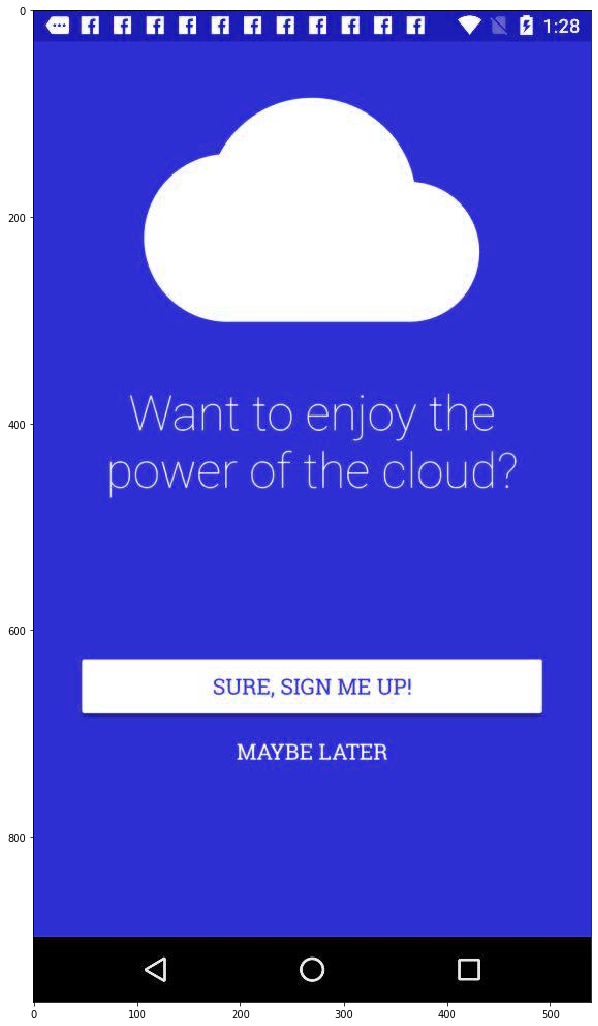

In [150]:
image = original_image.copy()
for icon in screenshot_annotation["android.widget.ImageView"]:
    x1,y1,x2,y2 = icon["bounds"]    
    print(x1,y1,x2,y2)
    pt1 = (math.ceil(x1 * w_r), math.ceil(y1 * h_r))
    pt2 = (math.ceil(x2 * w_r), math.ceil(y2 * h_r))
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, color=(0,255,0), thickness=5)
    
plt.imshow(image)